Import datasets and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

df = pd.read_csv('dataset/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
# Data Cleaning
df = df.drop('id', axis=1)
df = df.drop_duplicates()

# Remove outliers
df = df[df['ap_hi'] < 250]
df = df[df['ap_lo'] < 200]
df = df[df['ap_hi'] > 0]
df = df[df['ap_lo'] > 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68961 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68961 non-null  int64  
 1   gender       68961 non-null  int64  
 2   height       68961 non-null  int64  
 3   weight       68961 non-null  float64
 4   ap_hi        68961 non-null  int64  
 5   ap_lo        68961 non-null  int64  
 6   cholesterol  68961 non-null  int64  
 7   gluc         68961 non-null  int64  
 8   smoke        68961 non-null  int64  
 9   alco         68961 non-null  int64  
 10  active       68961 non-null  int64  
 11  cardio       68961 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.8 MB


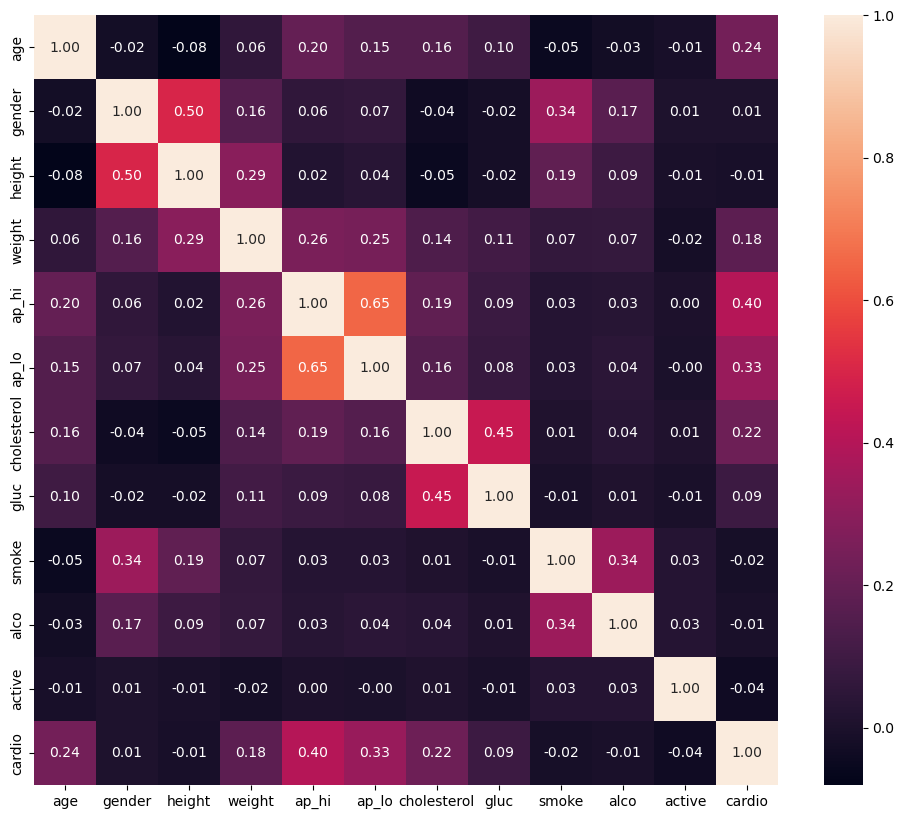

In [3]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [4]:
# Model Training
X = df.drop('cardio', axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:19:19] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [5]:
# Model Evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7321829913724353
[[5468 1475]
 [2219 4631]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6943
           1       0.76      0.68      0.71      6850

    accuracy                           0.73     13793
   macro avg       0.73      0.73      0.73     13793
weighted avg       0.73      0.73      0.73     13793



In [6]:
# Save the model
joblib.dump(model, 'xgboost_model.pkl')

['xgboost_model.pkl']